# <font color=blue>Assignments for "Data Exploration - Univariate Analysis"</font>

In this assignment, you will continue to study the data of the `US Education System` ([dataset](https://www.kaggle.com/spscientist/students-performance-in-exams/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

To complete this assignment, submit the Github link of the Jupyter notebook file containing solutions to the questions below. You can talk to your mentor on your head or ask Slack at office time.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [101]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import seaborn as sns

states = pd.read_csv("E:/user/Notebooks/data/states_all.csv")
states.drop(states[states.YEAR < 1991].index, inplace=True)
states.drop(states[states.YEAR > 2016].index, inplace=True)



**(1)** Interpret the data by making univariate analysis and indicate the points you consider important.

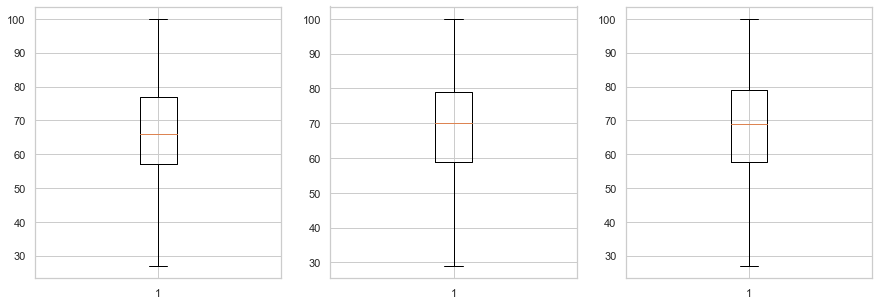

In [102]:


students = pd.read_csv("E:/user/Notebooks/data/StudentsPerformance.csv")
students.head(20)

students["winsorize_math score"] = winsorize(students["math score"], (0.008, 0))
students["winsorize_reading score"] = winsorize(students["reading score"], (0.006, 0.0))
students["winsorize_writing score"] = winsorize(students["writing score"], (0.005, 0.0))

import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.boxplot(students["winsorize_math score"])

plt.subplot(1,3,2)
plt.boxplot(students["winsorize_reading score"])

plt.subplot(1,3,3)
plt.boxplot(students["winsorize_writing score"]);


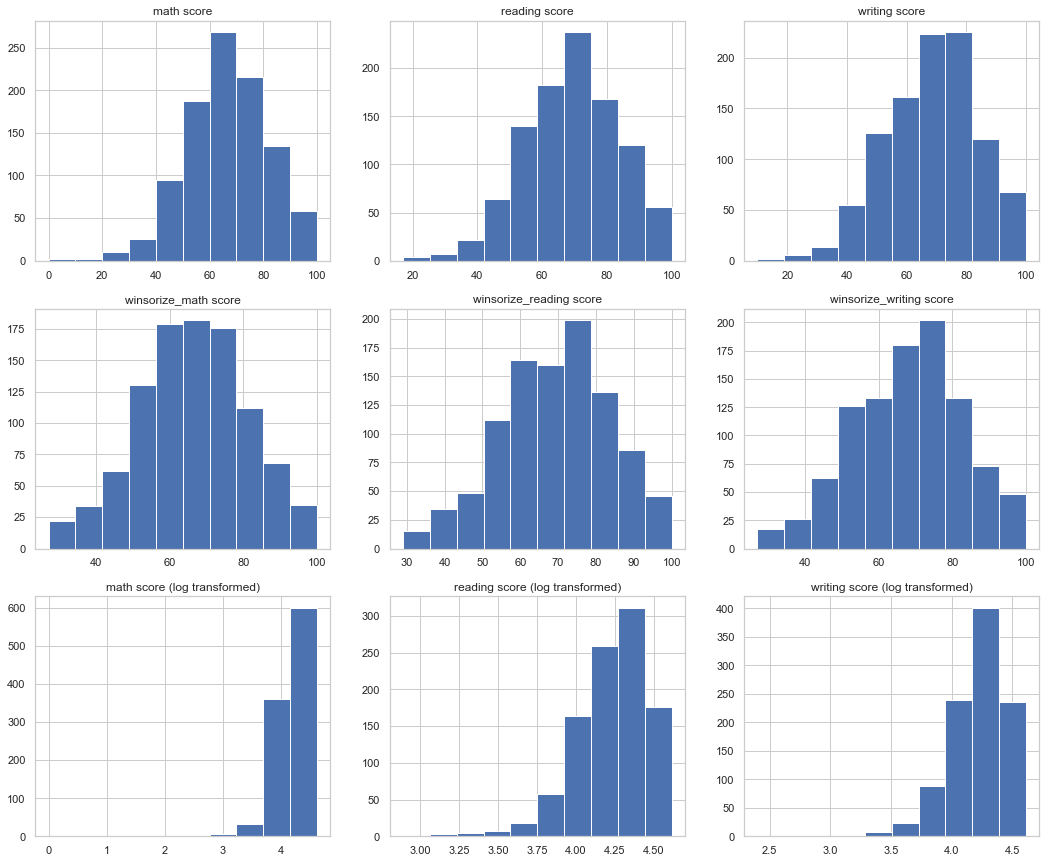

In [103]:
plt.figure(figsize=(18,15))
variables = ['math score', 'reading score' , 'writing score']
winsorize_variables= ['winsorize_math score', 'winsorize_reading score', 'winsorize_writing score']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(students[variables[i]])
    plt.title(variables[i])
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(students[winsorize_variables[i]])
    plt.title(winsorize_variables[i])
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(students[variables[i]]+1))
    plt.title(variables[i] + ' (log transformed)')

we see negatively skewness at all histograms.Hence median of variables is bigger than mean of it.

In [104]:
students.describe()

,math score,reading score,writing score,winsorize_math score,winsorize_reading score,winsorize_writing score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,66.165000,69.201000,68.100000
std,15.16308,14.600192,15.195657,14.922414,14.503481,15.052793
min,0.00000,17.000000,10.000000,27.000000,29.000000,27.000000
25%,57.00000,59.000000,57.750000,57.000000,59.000000,57.750000
50%,66.00000,70.000000,69.000000,66.000000,70.000000,69.000000
75%,77.00000,79.000000,79.000000,77.000000,79.000000,79.000000
max,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000


students are more succesful at reading exam than math and writing exams.Thare are not null variables each of features.There are outliers at low variables in math score,reading score,writing score features.

**(2)** Consider a state (eg California) and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

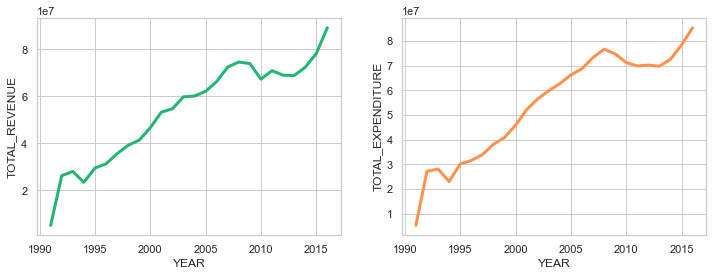

In [146]:
states1=states[states.STATE=='CALIFORNIA']
states1
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.lineplot(x = 'YEAR', y = 'TOTAL_REVENUE', data = states1, lw = 3, color = '#22B573')
plt.subplot(1,2,2)
sns.lineplot(x = 'YEAR', y = 'TOTAL_EXPENDITURE', data = states1, lw = 3, color = '#FF914D');



total revenue and total expenditure change in years, generally it increase by years.I have years summit at 1990s,bottom at 2015s

**(3)** In which course are students more successful in your chosen state? Mathematics or reading?

In [154]:
avg_math=(states1['AVG_MATH_4_SCORE']+states1['AVG_MATH_8_SCORE'])/2
avg_reading=(states1['AVG_READING_4_SCORE']+states1['AVG_READING_8_SCORE'])/2

print('math score in Colifornia ',avg_math.mean(),'reading score in Colifornia ',avg_reading.mean())

math score in Colifornia  255.46153846153845 reading score in Colifornia  237.76923076923077


**(4)** What is the distribution of mathematics and reading grades?

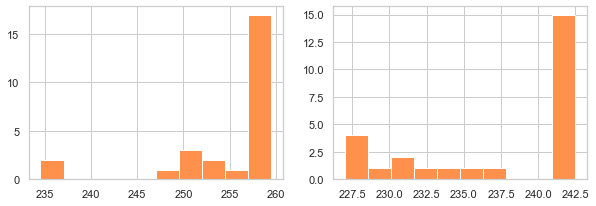

In [162]:
plt.figure(figsize=(10, 7))

plt.subplot(2,2,1)
plt.hist(avg_math, color="#FF914D") 
plt.subplot(2,2,2)
plt.hist(avg_reading, color="#FF914D")
plt.show()


**(5)** You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

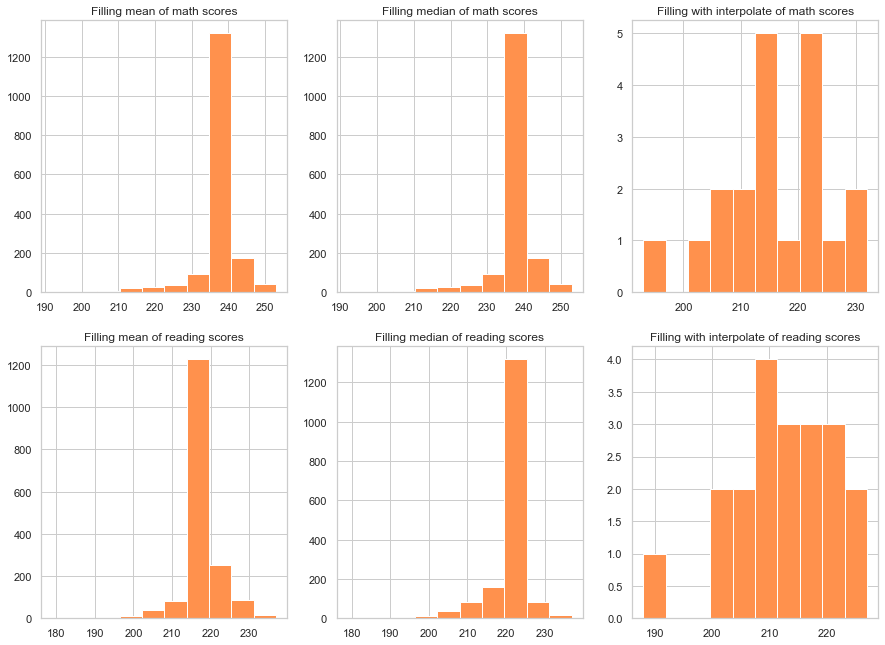

In [181]:
states = pd.read_csv("E:/user/Notebooks/data/states_all.csv")

plt.figure(figsize=(15, 17))

plt.subplot(3,3,1)
plt.hist(states["AVG_MATH_4_SCORE"].fillna(states["AVG_MATH_4_SCORE"].mean()), color="#FF914D")
plt.title('Filling mean of math scores')
plt.subplot(3,3,2)
plt.hist(states["AVG_MATH_4_SCORE"].fillna(states["AVG_MATH_4_SCORE"].median()), color="#FF914D")
plt.title('Filling median of math scores')
plt.subplot(3,3,3)
plt.hist(states["AVG_MATH_4_SCORE"].interpolate(method ='linear', limit_direction ='forward') .head(20), color="#FF914D")
plt.title('Filling with interpolate of math scores')

plt.subplot(3,3,4)
plt.hist(states["AVG_READING_4_SCORE"].fillna(states["AVG_READING_4_SCORE"].mean()), color="#FF914D")
plt.title('Filling mean of reading scores')
plt.subplot(3,3,5)
plt.hist(states["AVG_READING_4_SCORE"].fillna(states["AVG_READING_4_SCORE"].median()), color="#FF914D")
plt.title('Filling median of reading scores')
plt.subplot(3,3,6)
plt.hist(states["AVG_READING_4_SCORE"].interpolate(method ='linear', limit_direction ='forward') .head(20), color="#FF914D")
plt.title('Filling with interpolate of reading scores')
plt.show()
